In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from cabm import post_processing as ppr

random.seed(2)  # Set the seed "for Python's random module
np.random.seed(3)  # Set the seed for numpy's random module

In [2]:
from cabm import cabm_model

In [ ]:
model = cabm_model.ConsumerModel(1000, "config.toml", enable_ads=True, compare_brand_prices=False, enable_elasticity=False, enable_ad_increment=True)

In [4]:
num_steps = 104
for i in range(num_steps):
    model.step()

In [5]:
agent_df = model.datacollector.get_agent_vars_dataframe()

In [6]:
# Figure setup
# Set the font to Courier
mpl.rcParams['font.family'] = 'Courier'

# Set the line weight to thin
mpl.rcParams['lines.linewidth'] = 0.75

# Set the color scheme to black and white
mpl.rcParams['text.color'] = 'black'
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['axes.edgecolor'] = 'black'

In [7]:
agent_df = ppr.add_date_column(agent_df)

In [8]:
data_A = ppr.calculate_total_purchases(agent_df, ['price_A','tv_A','web_A', 'price_B', 'tv_B', 'web_B'], ['Total_Purchases_A', 'Total_Purchases_B'])

In [9]:
data_A = ppr.add_total_sales_columns(data_A, ['Total_Purchases_A', 'Total_Purchases_B'],  ['price_A','price_B'],)

In [10]:
data_A = ppr.ensure_float_columns(data_A, exclude_columns=['Date','Step'])

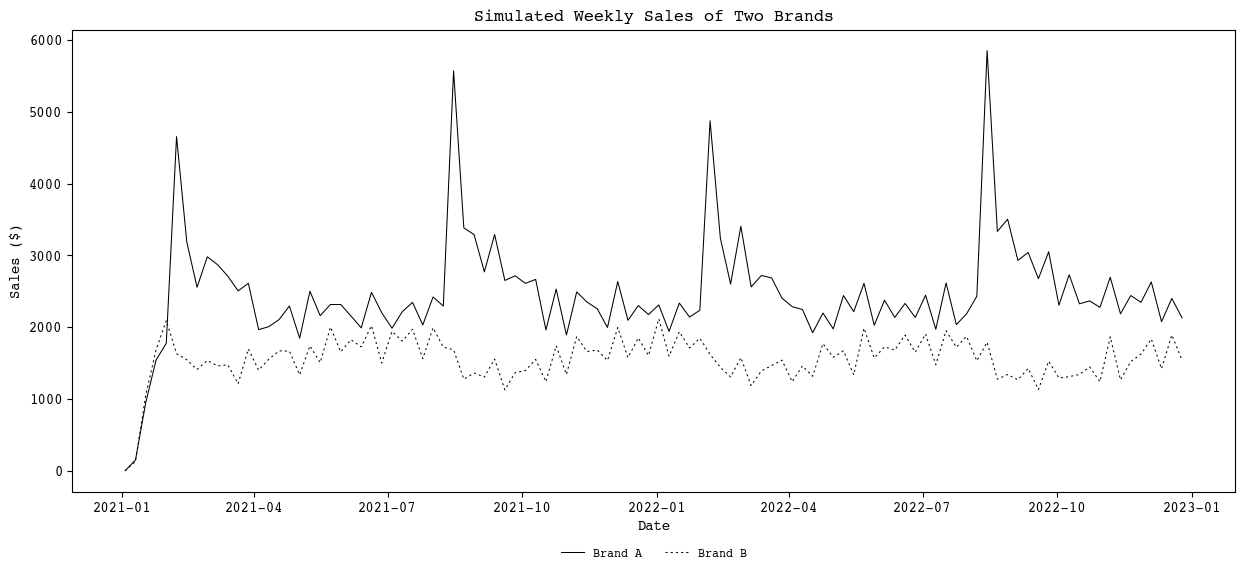

In [11]:
# Create the plot
plt.figure(figsize=(15,6))

plt.plot(data_A['Date'], data_A['Total_Sales_A'], label='Brand A', color='black')
plt.plot(data_A['Date'], data_A['Total_Sales_B'], label='Brand B', color='black', linestyle='--', dashes=[2,3])

plt.title('Simulated Weekly Sales of Two Brands')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=2, fontsize='small', frameon=False)

#plt.savefig("A_elast.png", dpi=200)
plt.show()